In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import json
from keras.preprocessing.image import load_img

def getTImages():
  folder = "drive/My Drive/images 2"
  images = []
  y = []
  json_data = open(folder +'/calories.json',mode='r').read()
  y_map = json.loads(json_data)
  for d in os.listdir(folder):
    f = folder+"/"+d;
    if(os.path.isdir(f)):
      for img in os.listdir(f):
        images.append(load_img(f+"/"+img, target_size=(224,224,3)))
        y.append(int(y_map[f.split('/')[-1]]))
  return images,y

Using TensorFlow backend.


In [0]:
def getYImages():
  folder = "drive/My Drive/yan img2"
  images = []
  y = []
  json_data = open(folder +'/calories.json',mode='r').read()
  y_map = json.loads(json_data)
  for d in os.listdir(folder):
    f = folder+"/"+d;
    if(os.path.isdir(f)):
      for img in os.listdir(f):
        images.append(load_img(f+"/"+img, target_size=(224,224,3)))
        y.append(int(y_map[f.split('/')[-1]]))
  return images,y

In [0]:
def getY2Images():
  folder = "drive/My Drive/Yan Img"
  images = []
  y = []
  for f in os.listdir(folder):
    json_data = open(folder+"/"+f+'/calories.json',mode='r').read()
    y_map = json.loads(json_data)
    for d in os.listdir(folder+"/"+f):
      if(os.path.isdir(folder+"/"+f+"/"+d)):
        for img in os.listdir(folder+"/"+f+"/"+d):
          images.append(load_img(folder+"/"+f+"/"+d+"/"+img, target_size=(224,224,3)))
          y.append(int(y_map[d]))
  return images,y

In [0]:
def getKImages():
  directory = "drive/My Drive/subway"
  images = []
  y = []
  json_data = open(directory +'/calories_json.json',mode='r').read()
  y_map = json.loads(json_data)
  for file in os.listdir(directory):
    if file.endswith(".png"):
      images.append(load_img(directory+"/"+file, target_size=(224,224,3)))
      y.append(int(y_map[file]))
  return images,y

  

In [0]:
images,y = getYImages()
images2,y2 = getY2Images()
images3,y3 = getKImages()
images4,y4 = getTImages()

y.extend(y2)
images.extend(images2)
y.extend(y3)
images.extend(images3)
y.extend(y4)
images.extend(images4)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
from imgaug import augmenters as iaa
import numpy as np
from PIL import Image

def augmentImages(x,y):
        x_train_aug = []
        y_train_aug = []
        
        for i in range(len(x)):
            x_train_aug.append(x[i])
            y_train_aug.append(y[i])
            
            #transformation one - adding random black dots in the image
            t = iaa.CoarseDropout(0.1, size_percent=0.2).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
            #transformation two - simple rotation
            t = iaa.Affine(rotate=(-25, 25)).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
        
            #transformation three - increasing the contrast of the objects in the image
            t = iaa.GammaContrast(1.5).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
            #transformation four - mirror effect
            t = iaa.Fliplr(p = 1.0).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
            #transformation five - blurring effect
            t = iaa.GaussianBlur((0, 3.0)).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
            #transformation six - cropping and padding, expand, squish, move effect
            t = iaa.CropAndPad(percent=(-0.25, 0.25)).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
            #transformation seven - it randomly moves pixels around within a given bound
            t = iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25).augment_images([np.array(x[i])])
            x_train_aug.append(Image.fromarray(np.uint8(t[0])))
            y_train_aug.append(y[i])
            
        return x_train_aug,y_train_aug

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(images, y, test_size=0.2, random_state=42)

xtrain_aug,ytrain_aug = augmentImages(xtrain,ytrain)

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mean_squared_error as mse
from keras import layers,models
from keras.applications.resnet50 import ResNet50

def cnn(width,
        height,
        depth,
        filters=(16, 32, 64),
        regress=False,
        ):

        # initialize the input shape and channel dimension, assuming
        # TensorFlow/channels-last ordering

        inputShape = (height, width, depth)
        chanDim = -1

        # define the model input

        inputs = Input(shape=inputShape)

        # loop over the number of filters

        for (i, f) in enumerate(filters):

            # if this is the first CONV layer then set the input
            # appropriately

            if i == 0:
                x = inputs

            # CONV => RELU => BN => POOL

            x = Conv2D(f, (3, 3), padding='same')(x)
            x = Activation('relu')(x)
            x = BatchNormalization(axis=chanDim)(x)
            x = MaxPooling2D(pool_size=(2, 2))(x)

            # flatten the volume, then FC => RELU => BN => DROPOUT

        x = Flatten()(x)
        x = Dense(256)(x)
        x = Activation('relu')(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Dropout(0.5)(x)

        # apply another FC layer, this one to match the number of nodes
        # coming out of the MLP

        x = Dense(128)(x)
        x = Activation('relu')(x)

        # check to see if the regression node should be added

        if regress:
           x = Dense(1, activation='linear')(x)

        # construct the CNN

        model = Model(inputs, x)

        # return the CNN

        return model

In [0]:
# #picking the best epoch

# from sklearn.metrics import mean_absolute_error as mae
# from keras.optimizers import Adam

# epochs = list(range(10,50,5))
# x_test_np = np.array([np.array(x) for x in xtest])
# y_test_np = np.array(ytest).astype('int')
# x_train_aug_np = np.array([np.array(x) for x in xtrain_aug])
# ytrain_aug = np.array(ytrain_aug).astype('int')
# maes = []

# for epoch in epochs:
#   custom_cnn = cnn(224,224,3,regress=True)
#   opt = Adam(lr=1e-3, decay=1e-3 / 200)
#   custom_cnn.compile(loss="mean_absolute_percentage_error", optimizer=opt)
#   custom_cnn.fit(x_train_aug_np, ytrain_aug, epochs=epoch, batch_size=8)
#   y_pred = custom_cnn.predict(x_test_np)
#   maes.append(mae(y_test_np,y_pred))
  













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Epoch 1/10
2592/2592 [==============================] - 18s 7ms/step - loss: 56.6022
Epoch 2/10
2592/2592 [==============================] - 14s 5ms/step - loss: 32.6885
Epoch 3/10
2592/2592 [==============================] - 14s 5ms/step - loss: 31.1712
Epoch 4/10
2592/2592 [==============================] - 14s 5ms/step - loss: 29.7289
Epoch 5/10
2592/2592 [==============================] - 14s 5ms/step - loss: 29.3959
Epoch 6/10
2592/2592 [==============================] - 14s 5ms/step - loss: 28.9089
Epoch 7/10
2592/2592 [==============================] - 14s 5ms/step - loss: 27.8604
Epoch 8/10
2592/2592 [==============================] - 14s 5ms/step - loss: 27.4641
Epoch 9/10
2592/2592 [==============================] - 14s 5ms/step - loss: 26.4326
Epoch 10/10
2592/2592 [==============================] - 14s 5ms/step - loss: 27.3337
Epoch 1/15
2592/259

In [0]:
# maes

[177.07455595040028,
 158.66804918830778,
 155.78768280406058,
 177.335326300727,
 195.15277212637443,
 151.48255807382088,
 157.97083367241754,
 164.44008740083672]

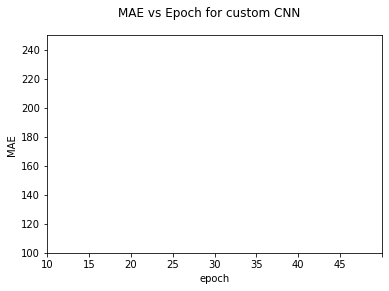

<Figure size 432x288 with 0 Axes>

In [0]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots()

# # We need to draw the canvas, otherwise the labels won't be positioned and 
# # won't have values yet.
# fig.canvas.draw()

# ax.set_xticklabels(epochs)

# plt.plot(maes)
# plt.ylim(100, 250)
# plt.xlim(10, 50)
# plt.ylabel('MAE')
# plt.xlabel('epoch')
# plt.suptitle('MAE vs Epoch for custom CNN')
# plt.show()
# plt.savefig('MAEvsEpochCustomCNN.png')
# # plt.plot(maes)

# # plt.ylim(100, 250)

# # plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


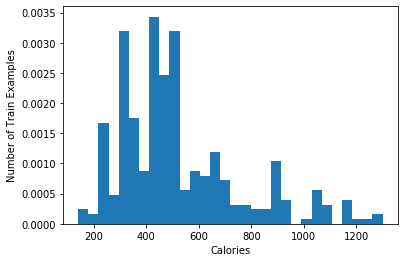

In [0]:
# from matplotlib.pyplot import plot,hist

# buckets = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# for y in ytrain_aug:
#   buckets[int(y/100)] += 1;
# #plot(list(range(len(buckets))),buckets)
# plt.hist(ytrain_aug, normed=True, bins=30)
# plt.ylabel('Number of Train Examples');
# plt.xlabel('Calories');
# plt.savefig('InputFrequencyPerCalories.png')

In [0]:
#best_epoch = epochs[np.argmin(maes)];
from sklearn.metrics import mean_absolute_error as mae

x_test_np = np.array([np.array(x) for x in xtest])
y_test_np = np.array(ytest).astype('int')
x_train_aug_np = np.array([np.array(x) for x in xtrain_aug])
ytrain_aug = np.array(ytrain_aug).astype('int')

best_epoch = 25

custom_cnn = cnn(224,224,3,regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
custom_cnn.compile(loss="mean_absolute_percentage_error", optimizer=opt)
custom_cnn.fit(x_train_aug_np, ytrain_aug, epochs=best_epoch, batch_size=8)

y_pred = custom_cnn.predict(x_test_np)
mae(y_test_np,y_pred)



Epoch 1/25
4032/4032 [==============================] - 13s 3ms/step - loss: 50.1201
Epoch 2/25
4032/4032 [==============================] - 9s 2ms/step - loss: 31.6879
Epoch 3/25
4032/4032 [==============================] - 9s 2ms/step - loss: 30.5829
Epoch 4/25
4032/4032 [==============================] - 9s 2ms/step - loss: 29.7930
Epoch 5/25
4032/4032 [==============================] - 9s 2ms/step - loss: 28.8780
Epoch 6/25
4032/4032 [==============================] - 9s 2ms/step - loss: 27.8988
Epoch 7/25
4032/4032 [==============================] - 9s 2ms/step - loss: 27.1992
Epoch 8/25
4032/4032 [==============================] - 9s 2ms/step - loss: 26.9841
Epoch 9/25
4032/4032 [==============================] - 9s 2ms/step - loss: 26.2371
Epoch 10/25
4032/4032 [==============================] - 9s 2ms/step - loss: 25.8791
Epoch 11/25
4032/4032 [==============================] - 9s 2ms/step - loss: 24.6941
Epoch 12/25
4032/4032 [==============================] - 9s 2ms/step - 

In [0]:
# buckets_x = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
# buckets_y = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
# i=0
# for y in y_test_np:
#   buckets_y[int(y/100)].append(y)
#   buckets_x[int(y/100)].append(x_test_np[i])
#   i+=1

# i=-1;
# mae_perbucket = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# for arr in buckets_x:
#   i+=1
#   if(len(arr) != 0):
#     x_temp = np.array(arr)
#     y_temp = np.array(buckets_y[i])
#     y_pred = custom_cnn.predict(x_temp)
#     mae_perbucket[i] = mae(y_temp,y_pred)

In [0]:
# mae_perbucket

[0,
 0,
 122.88350296020508,
 87.54210090637207,
 70.65539932250977,
 88.38367403470554,
 145.51705060686385,
 184.62328491210937,
 390.3877197265625,
 441.1401062011719,
 610.0276947021484,
 671.1918334960938,
 0,
 0,
 0]

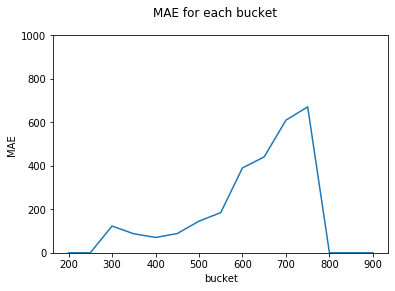

<Figure size 432x288 with 0 Axes>

In [0]:
# fig, ax = plt.subplots()

# # We need to draw the canvas, otherwise the labels won't be positioned and 
# # won't have values yet.
# fig.canvas.draw()

# ax.set_xticklabels(list(range(100,1500,100)))

# plt.plot(mae_perbucket)
# plt.ylim(0, 1000)
# plt.ylabel('MAE')
# plt.xlabel('bucket')
# plt.suptitle('MAE for each bucket')
# plt.show()
# plt.savefig('MAEForEachBucket.png')

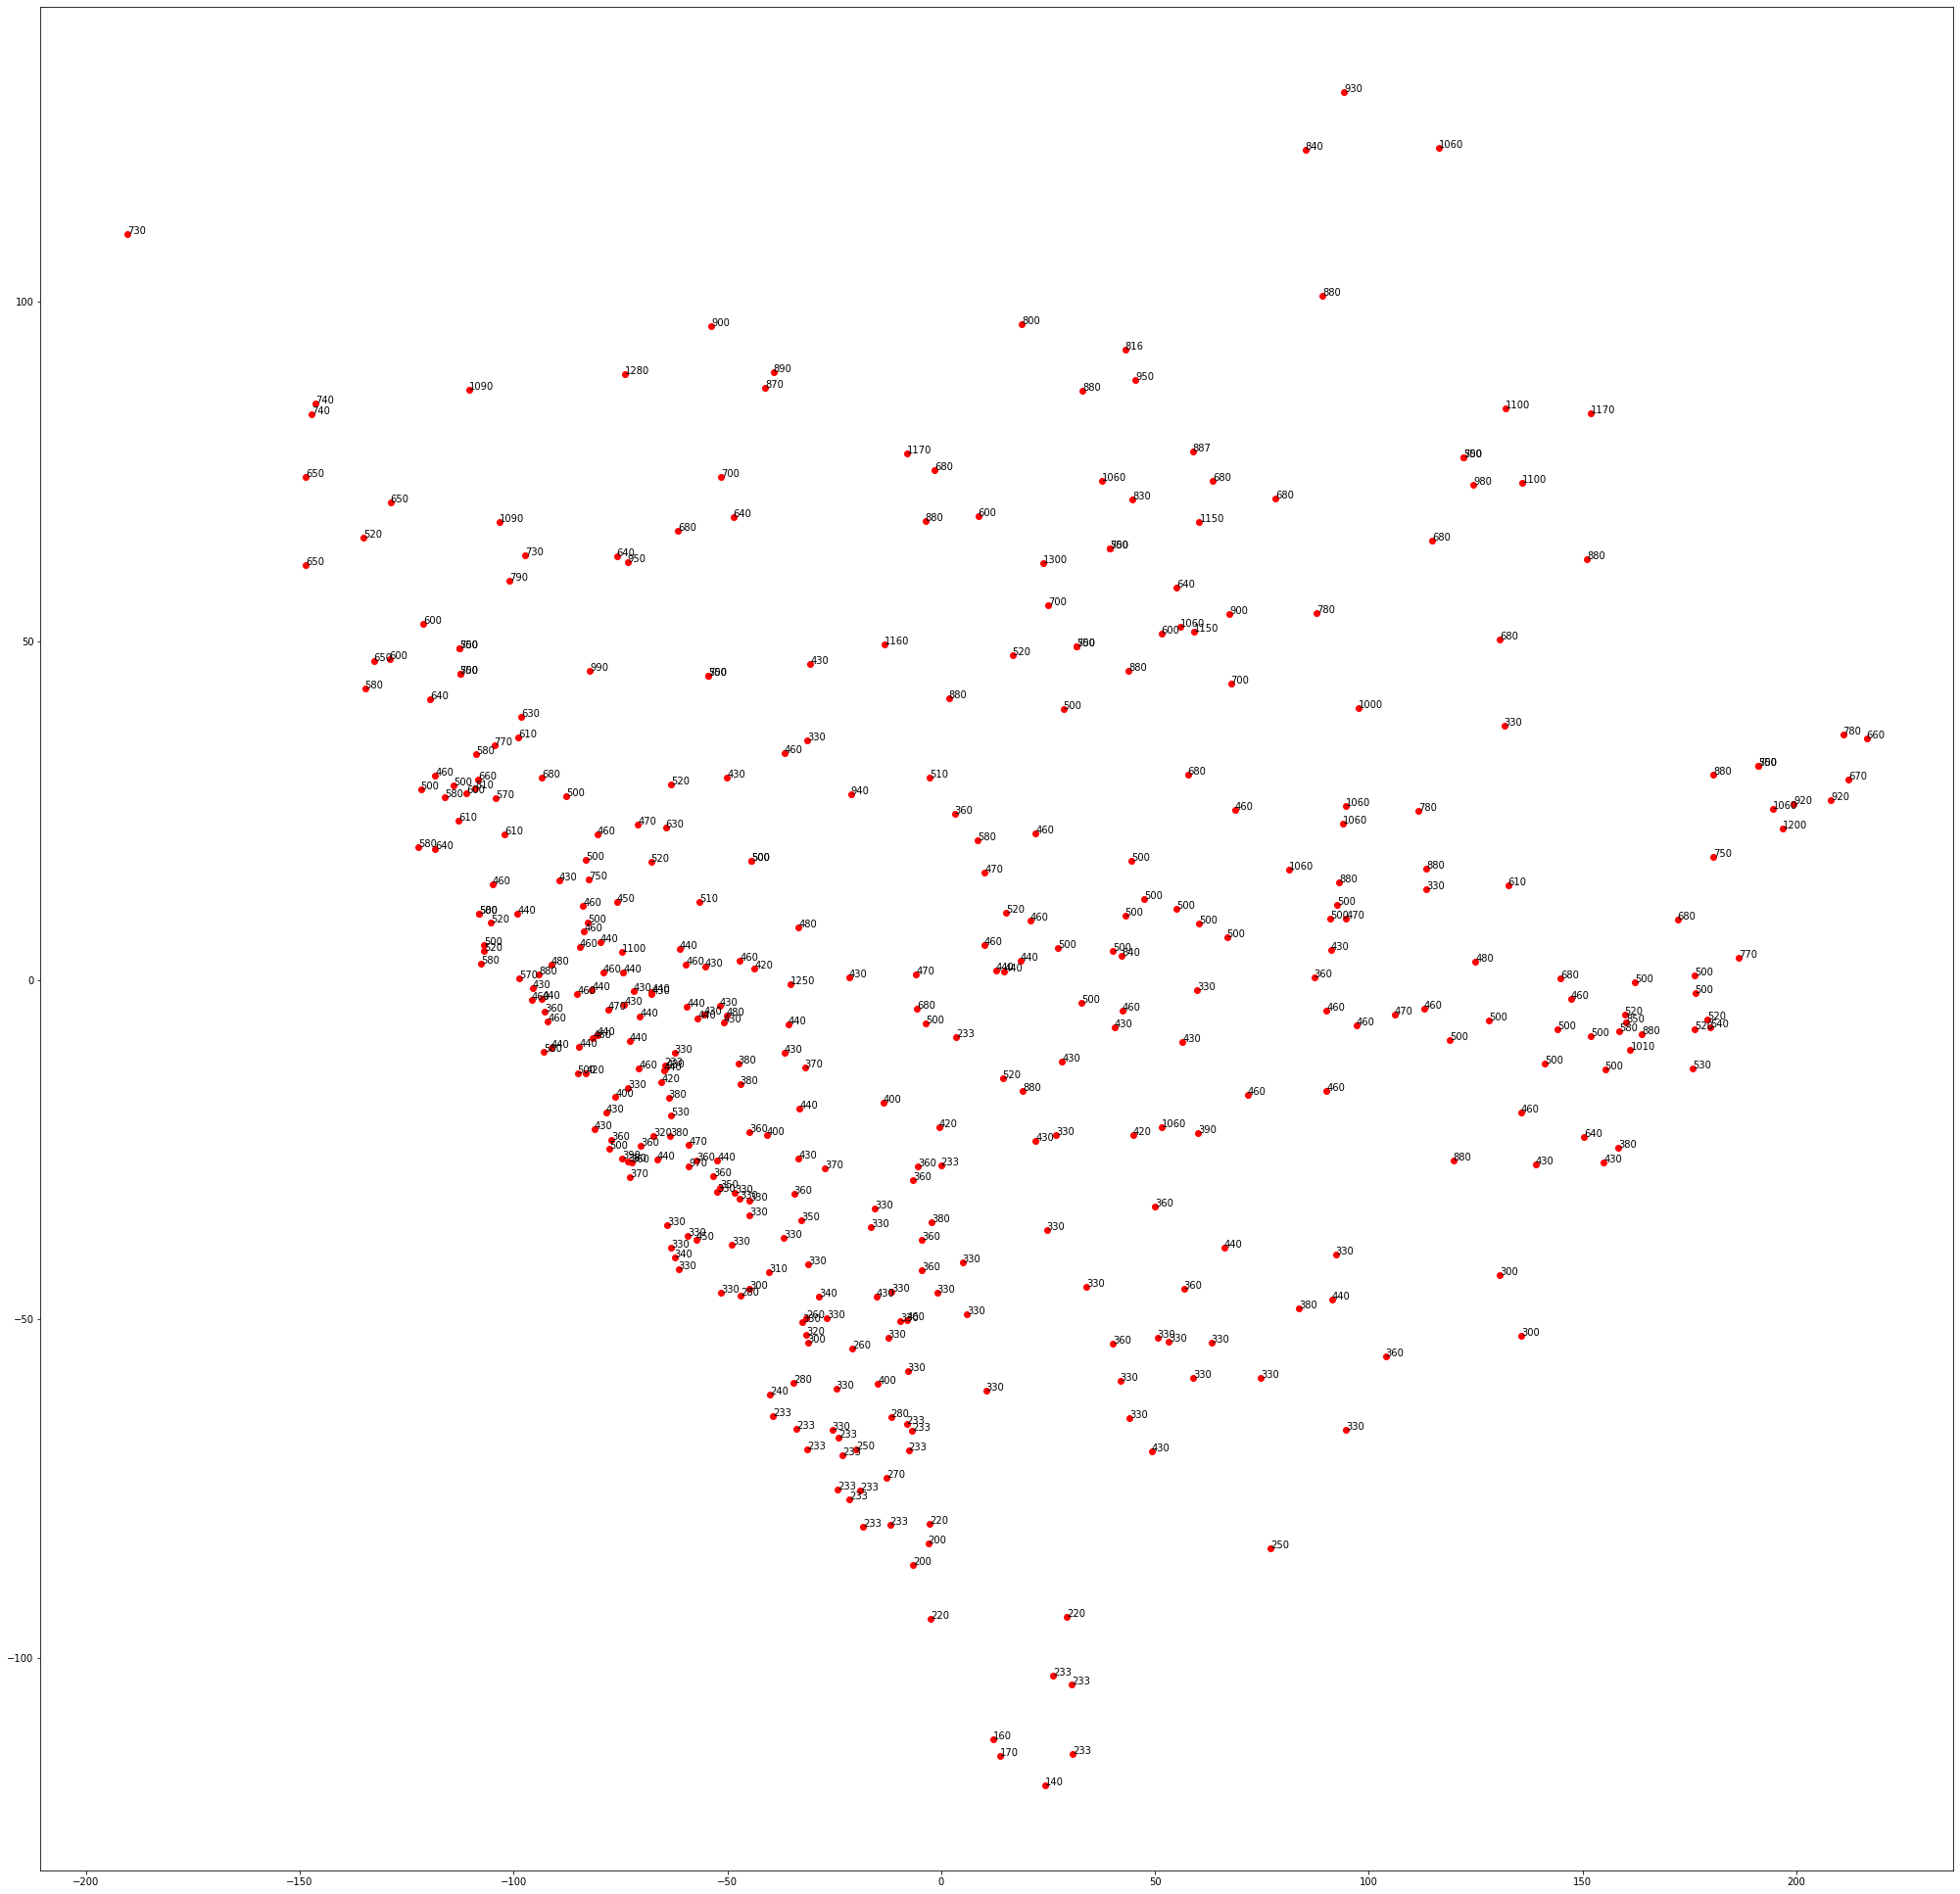

<Figure size 3240x3240 with 0 Axes>

In [0]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import keras
# import tensorflow as tf

# outputs = [layer.output for layer in custom_cnn.layers] 
# intermediate_layer_model = Model(inputs=custom_cnn.input,
#                                  outputs=outputs[-2])

# xtrain_forplot = np.array([np.array(x) for x in images])
# y_pred = intermediate_layer_model.predict(xtrain_forplot)
# pca_a = PCA(n_components=2)
# pca_a.fit(y_pred)
# out_pca_train_2 = pca_a.fit_transform(y_pred)
# plt.scatter(out_pca_train_2[:,0], out_pca_train_2[:,1], c='r', marker='o')

# for i, txt in enumerate(y):
#     plt.annotate(txt, (out_pca_train_2[i,0], out_pca_train_2[i,1]))
# plt.rcParams["figure.figsize"] = [45,45]
# plt.show()
# plt.savefig("InputsScatter")

[0, 24, 232, 568, 608, 432, 232, 136, 136, 56, 80, 56, 24, 8, 0, 0, 0, 0, 0, 0]


In [0]:
from tensorflow import lite

custom_cnn.save('cnn_untrained_30ep_8b_adam_burgers.h5')
converter = lite.TFLiteConverter.from_keras_model_file('cnn_untrained_30ep_8b_adam_burgers.h5')
#converter.allow_custom_ops = True
tfmodel = converter.convert()
open("model.tflite","wb").write(tfmodel)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 28 variables.
INFO:tensorflow:Converted 28 variables to const ops.


51615708

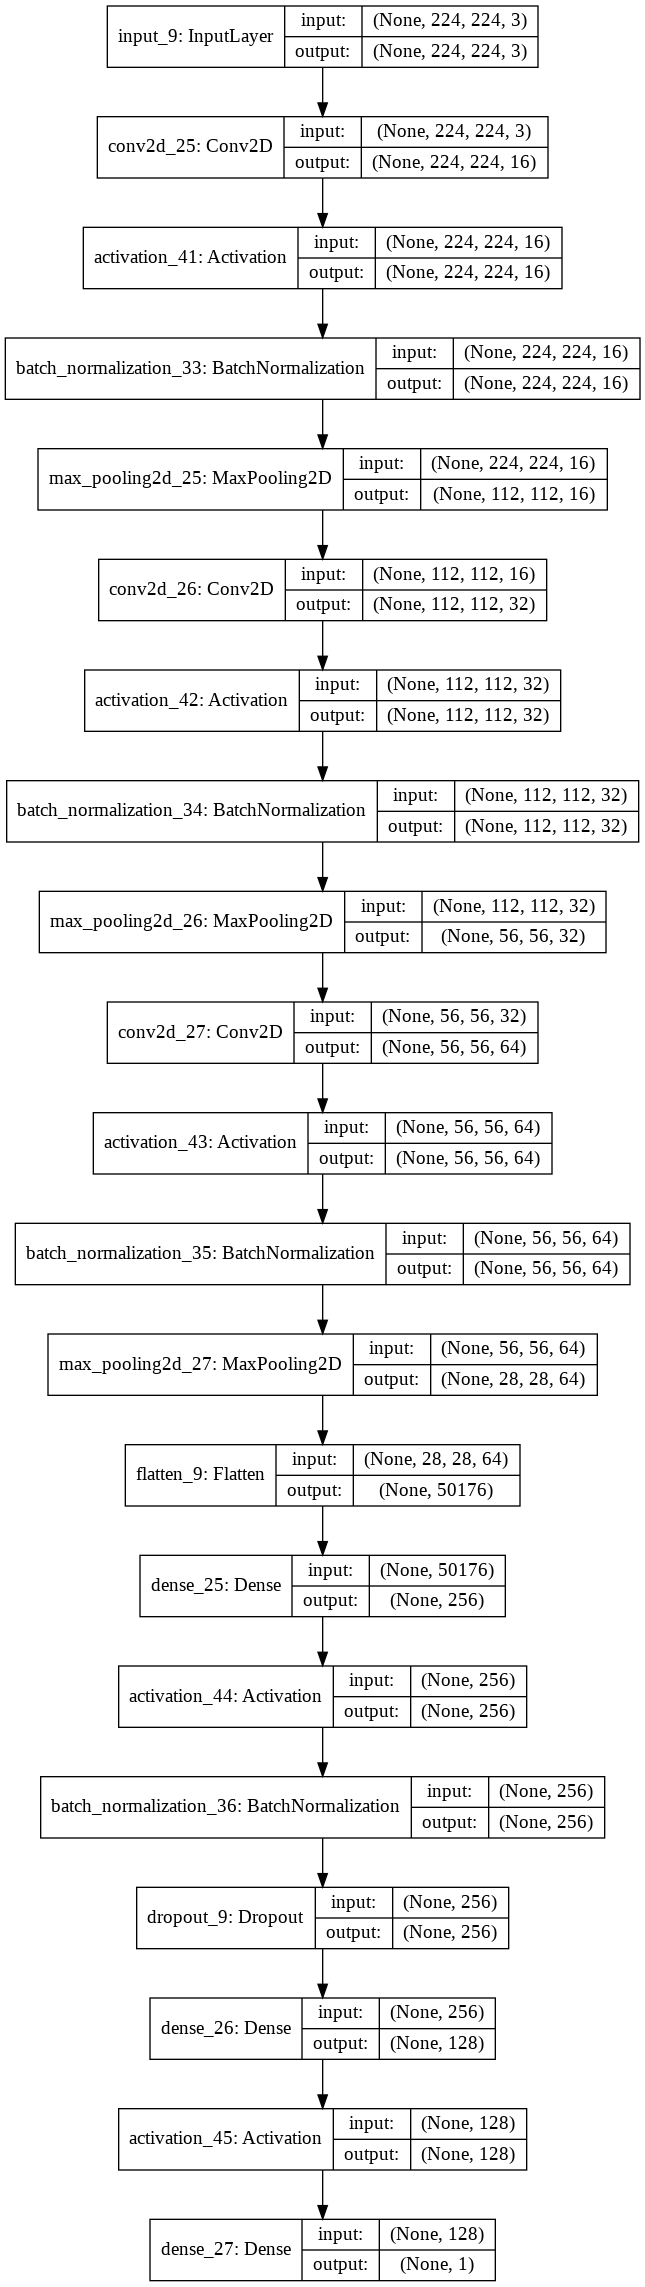

In [0]:
# from keras.utils.vis_utils import plot_model

# plot_model(custom_cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)